<a href="https://colab.research.google.com/github/N1heo/Habinator/blob/main/Midterm_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Abstact**
Neural network to predict whether the auto crash will be severe or not,

[link to the dataset](https://www.kaggle.com/datasets/swish9/synthetic-indian-automobile-crash-data/code)
, later on, there appeared one solution, but it was much later after I started.
```
              precision    recall  f1-score   support

           0       0.66      1.00      0.80      1343
           1       1.00      0.49      0.66      1343

    accuracy                           0.74      2686
   macro avg       0.83      0.74      0.73      2686
weighted avg       0.83      0.74      0.73      2686

```
The **confusion matrix** can be seen at the bottom of the page

I've got a lot of false negatives, which significantly decreases the accuracy, I tried using SMOTE, ensemble etc. techniques but they didn't seem to help.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/synthetic_automobile_crash_data_india.csv')
# df.sample(10)

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count[0:25]

Vehicle_make                  0
Vehicle_type                  0
Vehicle_year                  0
Engine_type                   0
Engine_displacement           0
Transmission_type             0
Number_of_cylinders           0
Vehicle_weight                0
Vehicle_length                0
Vehicle_width                 0
Vehicle_height                0
Safety_rating                 0
Number_of_airbags             0
ABS_presence                989
ESC_presence                974
TCS_presence                983
TPMS_presence               942
Crash_location             1026
Weather_conditions         1026
Road_surface_conditions    1042
Time_of_day                   0
Day_of_week                1271
Driver_age                    0
Driver_gender               301
Crash_severity                0
dtype: int64

In [ ]:
col_to_count = ['ABS_presence', 'ESC_presence', 'TCS_presence', 'TPMS_presence', 'Crash_location', 'Weather_conditions', 'Road_surface_conditions','Day_of_week', 'Driver_gender']
for col in col_to_count:
  value_counts = df[col].value_counts()
  most_frequent_value = value_counts.idxmax()
  frequency = value_counts.max()
  print(col, "----")
  print("Most frequent value:", most_frequent_value)
  print( value_counts)
  print()

ABS_presence ----
Most frequent value: 1.0
1.0    6987
0.0    2024
Name: ABS_presence, dtype: int64

ESC_presence ----
Most frequent value: 1.0
1.0    7096
0.0    1930
Name: ESC_presence, dtype: int64

TCS_presence ----
Most frequent value: 1.0
1.0    6938
0.0    2079
Name: TCS_presence, dtype: int64

TPMS_presence ----
Most frequent value: 1.0
1.0    7048
0.0    2010
Name: TPMS_presence, dtype: int64

Crash_location ----
Most frequent value: urban
urban    5980
rural    2994
Name: Crash_location, dtype: int64

Weather_conditions ----
Most frequent value: clear
clear    5920
rain     2041
fog      1013
Name: Weather_conditions, dtype: int64

Road_surface_conditions ----
Most frequent value: dry
dry      5967
wet      2021
muddy     970
Name: Road_surface_conditions, dtype: int64

Day_of_week ----
Most frequent value: Wednesday
Wednesday    1290
Saturday     1282
Friday       1282
Thursday     1242
Tuesday      1227
Monday       1223
Sunday       1183
Name: Day_of_week, dtype: int64

Dr

In [ ]:
df['ABS_presence'].fillna(1, inplace=True)
df['ESC_presence'].fillna(1, inplace=True)
df['TCS_presence'].fillna(1, inplace=True)
df['TPMS_presence'].fillna(1, inplace=True)
df['Crash_location'].fillna('urban', inplace=True)
df['Weather_conditions'].fillna('clear', inplace=True)
df['Road_surface_conditions'].fillna('dry', inplace=True)
df['Day_of_week'].fillna('Wednesday', inplace=True)
df['Driver_gender'].fillna('Female', inplace=True)


In [ ]:
df['Transmission_type'].replace({'automatic': 1,'manual': 0},inplace=True)
df['Crash_location'].replace({'rural': 1,'urban': 0},inplace=True)
df['Driver_gender'].replace({'Male': 1,'Female': 0},inplace=True)

df2 = pd.get_dummies(data=df, columns=['Vehicle_make', 'Vehicle_type', 'Engine_type', 'Weather_conditions', 'Road_surface_conditions', 'Time_of_day', 'Day_of_week', 'Crash_severity'], dtype='int')

from datetime import datetime
current_year = datetime.now().year

# Calculate age of vehicles
df2['Vehicle_age'] = current_year - df2['Vehicle_year']
df2.drop(columns=['Vehicle_year'], inplace=True)

In [ ]:
# columns_to_int=['ABS_presence','ESC_presence','TCS_presence','TPMS_presence']
# for col in columns_to_int:
#     df2[col] = df2[col].astype(int)

cols_to_scale = ['Vehicle_age',
'Engine_displacement',
'Number_of_cylinders',
'Vehicle_weight',
'Vehicle_length',
'Vehicle_width',
'Vehicle_height',
'Safety_rating',
'Number_of_airbags',
'Driver_age']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2.shape

(10000, 50)

In [ ]:
# prompt: visualize relationship between Vehicle_age and Crash_severity_severe

# import matplotlib.pyplot as plt

# # Create a scatter plot of Vehicle_age vs. Crash_severity_severe
# plt.bar(df2['Vehicle_age'], df2['Crash_severity_severe'])

# # Set the title and axis labels
# plt.title('Relationship between Vehicle Age and Crash Severity')
# plt.xlabel('Vehicle Age')
# plt.ylabel('Crash Severity (Severe)')

# # Display the plot
# plt.show()


In [ ]:
df2 = df2.drop(['Crash_severity_moderate'], axis='columns')
df2 = df2.drop(['Crash_severity_severe'], axis='columns')


In [ ]:
X = df2.drop(['Crash_severity_minor'], axis='columns')
y = df2.Crash_severity_minor

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

# y_train.value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=15, stratify=y_sm)
y_train.value_counts()

0    5370
1    5370
Name: Crash_severity_minor, dtype: int64

In [ ]:
y_train.value_counts()

0    5370
1    5370
Name: Crash_severity_minor, dtype: int64

In [ ]:
X_train

,Engine_displacement,Transmission_type,Number_of_cylinders,Vehicle_weight,Vehicle_length,Vehicle_width,Vehicle_height,Safety_rating,Number_of_airbags,ABS_presence,...,Time_of_day_morning,Time_of_day_night,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Vehicle_age
6788,0.258299,1,0.000000,0.874044,0.246164,0.185309,0.197995,0.666667,0.833333,1.0,...,1,0,0,1,0,0,0,0,0,0.045455
3856,0.365166,0,0.333333,0.350206,0.424283,0.550918,0.313283,0.000000,0.666667,1.0,...,0,1,0,0,0,0,1,0,0,0.409091
11905,0.890310,0,0.525842,0.164792,0.836394,0.758875,0.704267,1.000000,0.341947,1.0,...,0,0,0,0,0,0,1,0,0,0.318182
10970,0.387523,1,0.790757,0.366856,0.380901,0.329745,0.646446,0.666667,0.000000,1.0,...,0,0,0,0,0,0,0,0,1,0.478877
1028,0.665757,0,1.000000,0.345497,0.181454,0.225376,0.889724,1.000000,0.833333,1.0,...,0,0,0,1,0,0,0,0,0,0.590909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531,0.956799,0,0.333333,0.732784,0.068045,0.465776,0.180451,0.333333,1.000000,1.0,...,0,0,1,0,0,0,0,0,0,0.000000
9342,0.108686,0,0.333333,0.121248,0.350901,0.719533,0.563910,0.333333,0.000000,0.0,...,1,0,0,0,1,0,0,0,0,0.409091
12810,0.176810,0,0.028152,0.219408,0.573771,0.193700,0.707749,1.000000,0.152591,1.0,...,0,0,0,0,1,0,0,0,0,0.700400
783,0.932697,1,0.333333,0.230724,0.048699,0.422371,0.922306,1.000000,0.666667,1.0,...,0,1,0,0,0,0,0,1,0,0.636364


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras import regularizers
#, kernel_regularizer=regularizers.l1(0.001))

model = keras.Sequential([
    keras.layers.Dense(39, input_shape=(47,), activation='relu',kernel_regularizer=regularizers.l1(0.0011)),
    keras.layers.Dense(35, activation='relu'),
    keras.layers.Dense(29, activation='relu'),
    keras.layers.Dense(21, activation='relu'),
    Dropout(0.1),
    keras.layers.Dense(11, activation='relu'),
    Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

# sgd = SGD(lr = 0.001, decay=1e-6)
model.compile(optimizer=Adam(learning_rate=0.0011),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2)
# model.summary()

Epoch 1/50
269/269 [==============================] - 8s 11ms/step - loss: 0.8479 - accuracy: 0.5140 - val_loss: 0.7602 - val_accuracy: 0.5475
Epoch 2/50
269/269 [==============================] - 2s 9ms/step - loss: 0.7223 - accuracy: 0.5917 - val_loss: 0.6934 - val_accuracy: 0.6201
Epoch 3/50
269/269 [==============================] - 2s 7ms/step - loss: 0.6486 - accuracy: 0.6660 - val_loss: 0.6041 - val_accuracy: 0.6839
Epoch 4/50
269/269 [==============================] - 2s 7ms/step - loss: 0.5931 - accuracy: 0.6975 - val_loss: 0.5732 - val_accuracy: 0.7216
Epoch 5/50
269/269 [==============================] - 2s 8ms/step - loss: 0.5748 - accuracy: 0.7030 - val_loss: 0.5426 - val_accuracy: 0.7337
Epoch 6/50
269/269 [==============================] - 1s 4ms/step - loss: 0.5606 - accuracy: 0.7138 - val_loss: 0.5500 - val_accuracy: 0.7295
Epoch 7/50
269/269 [==============================] - 1s 3ms/step - loss: 0.5424 - accuracy: 0.7247 - val_loss: 0.5323 - val_accuracy: 0.7360
Epoch

In [ ]:
model.evaluate(X_test, y_test)

84/84 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.7446


[0.5023646950721741, 0.7446016669273376]

In [ ]:
yp = model.predict(X_test)
yp[:10]

84/84 [==============================] - 1s 6ms/step


array([[0.37832484],
       [0.37878093],
       [0.38664198],
       [0.38916862],
       [0.3818649 ],
       [0.38142487],
       [0.998672  ],
       [0.37559843],
       [0.3756052 ],
       [0.99996436]], dtype=float32)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_test[:10]

1329     1
7865     0
7489     0
6711     0
10127    1
6368     1
11980    1
1532     0
1153     0
11739    1
Name: Crash_severity_minor, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80      1343
           1       1.00      0.49      0.66      1343

    accuracy                           0.74      2686
   macro avg       0.83      0.74      0.73      2686
weighted avg       0.83      0.74      0.73      2686



Text(95.72222222222221, 0.5, 'Truth')

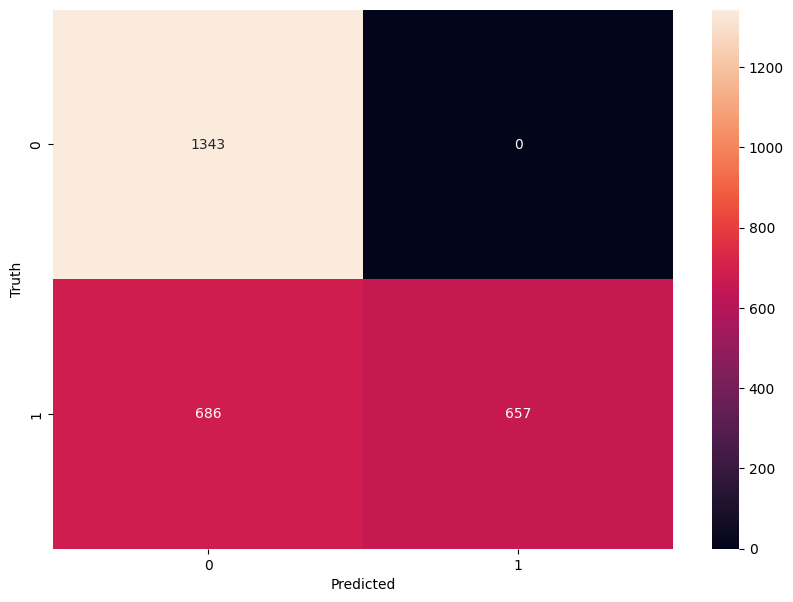

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')